In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from sklearn.model_selection import train_test_split

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = sc.fit_transform(dataset.iloc[:,:-1].values)
y = dataset.iloc[:,-1].values

In [42]:
som = MiniSom(x=10 , y=10 , input_len=15 , sigma=1.0 , learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X , num_iteration=500)

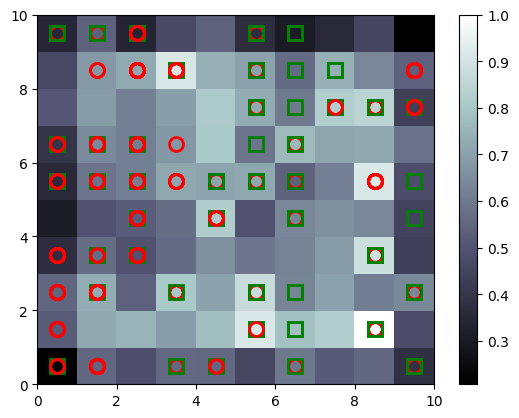

In [43]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [44]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,8)], mappings[(8,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)
# mappings[(4,5)]

In [45]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15648069
15731586
15575605
15644453
15801473
15694666
15646594
15699238
15593959
15629750
15592999
15577771
15742009
15599272
15711299
15721504
15611682
15608916
15786237
15767358
15642336
15740487
15811742
15715907
15768342
15748532
15788634


In [47]:
customers = dataset.iloc[:,1:].values

In [58]:
is_fraud = np.zeros(len(dataset))
# is_fraud.flatten()

In [59]:
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [61]:
customers = sc.fit_transform(customers)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [62]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform' ,activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(customers, is_fraud, batch_size = 32, epochs = 100)


Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.6273 - accuracy: 0.9609
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.9609
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.9609
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.9609
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.9609
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9609
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.9609
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9609
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9609
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9609
Epoch 11/

In [74]:
y_pred = ann.predict(customers)


22/22 [==============================] - 0s 1ms/step


In [73]:
y_pred.shape

(690, 1)

In [75]:
y_pred2 = np.concatenate((dataset.iloc[:,0:1].values , y_pred) , axis = 1)


(690, 2)

In [77]:
y_pred2 = y_pred2[y_pred2[:, 1].argsort()]
y_pred2

array([[1.56214230e+07, 1.55872456e-07],
       [1.57901130e+07, 9.95615892e-07],
       [1.57063940e+07, 9.99824465e-07],
       ...,
       [1.56946660e+07, 6.10383034e-01],
       [1.55777710e+07, 6.13944888e-01],
       [1.57315860e+07, 6.14095151e-01]])